# Recommendation Systems 
เอกสารประกอบ
- https://medium.com/@lope.ai/recommendation-systems-from-scratch-in-python-pytholabs-6946491e76c2
- https://realpython.com/numpy-scipy-pandas-correlation-python/
- https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/


# Euclidean Distance

![title](euclideanDistance.png)

# Cosine similarity

![title](cosin.png)

In [3]:
import math

v = math.cos(math.pi/2)
round(v,10)

0.0

In [4]:
v = math.cos(-math.pi/2)
round(v,10)

0.0

In [5]:
v = math.cos(0)
v

1.0

In [6]:
v = math.cos(math.pi)
v

-1.0

In [80]:
from scipy import spatial
List1 = [4, 47, 8, 3]
List2 = [3, 52, 12, 16]
result = 1 - spatial.distance.cosine(List1, List2)
print(result)

0.9720951480078084


# 1.User-User collaborative filtering

![title](User-User_collaborative_filtering.png)

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

x = np.arange(10, 20)
y = np.array([0, 1, 4, 5, 8, 12, 18, 25, 27, 30])

#The correlation coefficient  / The p-value
scipy.stats.pearsonr(x, y)

(0.9790912050435228, 8.153713059207908e-07)

In [8]:
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

0.9790912050435228

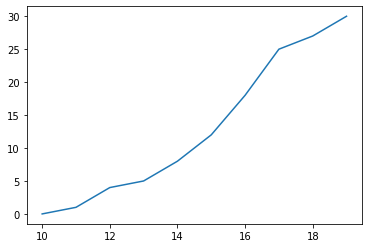

In [9]:
plt.plot(x,y)

In [10]:
import pandas as pd
pd.DataFrame({'x':x,'y':y}).corr()   #<---- Pearson's r

x         y
x  1.000000  0.979091
y  0.979091  1.000000

In [47]:
# ตัวอย่าง
usrA = [4,1,0,4,0]
usrB = [0,4,0,2,3]
usrC = [0,1,0,4,4]
df = pd.DataFrame({'A':usrA,'B':usrB,'C':usrC})
df = df.T

In [48]:
df

0  1  2  3  4
A  4  1  0  4  0
B  0  4  0  2  3
C  0  1  0  4  4

In [49]:
scipy.stats.pearsonr(usrA, usrC)

(0.047619047619047644, 0.9393924672929722)

In [50]:
scipy.stats.pearsonr(usrA, usrB)

(-0.28641098093473993, 0.6403791530136383)

In [51]:
scipy.stats.pearsonr(usrB, usrC)

(0.5319061074502314, 0.35620565648090274)

In [56]:
df.columns = ['X1','X2','X3','X4','X5']
df

X1  X2  X3  X4  X5
A   4   1   0   4   0
B   0   4   0   2   3
C   0   1   0   4   4

In [53]:
df.T.corr()

A         B         C
A  1.000000 -0.286411  0.047619
B -0.286411  1.000000  0.531906
C  0.047619  0.531906  1.000000

# หาความคล้ายกัน เอาข้อเฉพาะข้อมูลที่ซื้อหรือชอบเหมือนกันเท่านั้นมาคิด

Here we have a user movie rating matrix. To understand this in a more practical manner, let’s find the similarity between users (A, C) and (B, C) in the above table using Pearson’s correlation. Common movies rated by A and C are movies x2 and x4 and by B and C are movies x2, x4 and x5.

In [60]:
# AC
scipy.stats.pearsonr([1,4], [1,4])

(1.0, 1.0)

In [61]:
# BC
scipy.stats.pearsonr([4,2,3], [1,4,4])

(-0.8660254037844388, 0.33333333333333315)

The correlation between user A and C is more than the correlation between B and C. Hence users A and C have more similarity and the movies liked by user A will be recommended to user C and vice versa.

# 2.Item-Item collaborative filtering

In [64]:
# ตัวอย่าง
usrA = [4,1,2,4,4]
usrB = [2,4,4,2,1]
usrC = [0,1,0,3,4]
df = pd.DataFrame({'A':usrA,'B':usrB,'C':usrC})
df = df.T

df.columns = ['X1','X2','X3','X4','X5']
df

X1  X2  X3  X4  X5
A   4   1   2   4   4
B   2   4   4   2   1
C   0   1   0   3   4

In [112]:
scipy.stats.pearsonr([4,2], [4,1])

(1.0, 1.0)

# ตัวอย่าง
####  https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/
![title](cosin_2.png)

In [145]:
# 1,2
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
A=np.array([5,3])
B=np.array([2,3])
result=cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
print(result)

[[0.90373784]]


In [133]:
(5*2)+(3*3)

19

In [134]:
((5**2+3**2)**(0.5))*((2**2+3**2)**(0.5))

21.02379604162864

In [143]:
19/21.02379604162864

0.9037378388935388

In [144]:
# 2,3
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
A=np.array([3,1])
B=np.array([2,2])
result=cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
print(result)

[[0.89442719]]


In [146]:
# 3,1 
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
A=np.array([2,3])
B=np.array([3,1])
result=cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
print(result)

[[0.78935222]]


# สรุป

#### (1,2) > (1,3)   # ถ้ามี user search item_1 เราจะแนะนำ item_2 

#### (1,2) > (2,3)   # ถ้ามี user search item_2 เราจะแนะนำ item_1 